In [1]:
import pandas as pd
import numpy as np

# Datos ficticios de ventas
data_ventas = {
    'Cliente': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'Edad': [23, 45, 35, 28, 40, 50, 33, 24, 36, 29],
    'Género': ['F', 'M', 'M', 'F', 'M', 'F', 'M', 'F', 'F', 'M'],
    'Ventas Totales': [100, 200, 150, 120, 180, 160, 220, 140, 210, 250],
    'Producto': ['Camiseta', 'Zapatos', 'Pantalón', 'Camiseta', 'Zapatos', 
                 'Camiseta', 'Pantalón', 'Camiseta', 'Zapatos', 'Pantalón'],
    'Cantidad': [1, 2, 1, 3, 1, 2, 1, 2, 3, 1]
}

# Crear el DataFrame
df_ventas = pd.DataFrame(data_ventas)

df_ventas

,Cliente,Edad,Género,Ventas Totales,Producto,Cantidad
0,A,23,F,100,Camiseta,1
1,B,45,M,200,Zapatos,2
2,C,35,M,150,Pantalón,1
3,D,28,F,120,Camiseta,3
4,E,40,M,180,Zapatos,1
5,F,50,F,160,Camiseta,2
6,G,33,M,220,Pantalón,1
7,H,24,F,140,Camiseta,2
8,I,36,F,210,Zapatos,3
9,J,29,M,250,Pantalón,1


In [18]:
df_ventas = df_ventas.dropna()
df_ventas['Producto'] = df_ventas['Producto'].str.strip()
df_ventas = df_ventas.drop_duplicates()

In [19]:
ventasEdad = df_ventas.groupby('Edad')['Ventas Totales'].agg(['sum','mean', 'median']).reset_index()
ventasEdad

,Edad,sum,mean,median
0,23,100,100.0,100.0
1,24,140,140.0,140.0
2,28,120,120.0,120.0
3,29,250,250.0,250.0
4,33,220,220.0,220.0
5,35,150,150.0,150.0
6,36,210,210.0,210.0
7,40,180,180.0,180.0
8,45,200,200.0,200.0
9,50,160,160.0,160.0


In [16]:
ventasGenero = df_ventas.groupby('Género')['Ventas Totales'].agg(['sum','mean', 'median']).reset_index()
ventasGenero

,Género,sum,mean,median
0,F,730,146.0,140.0
1,M,1000,200.0,200.0


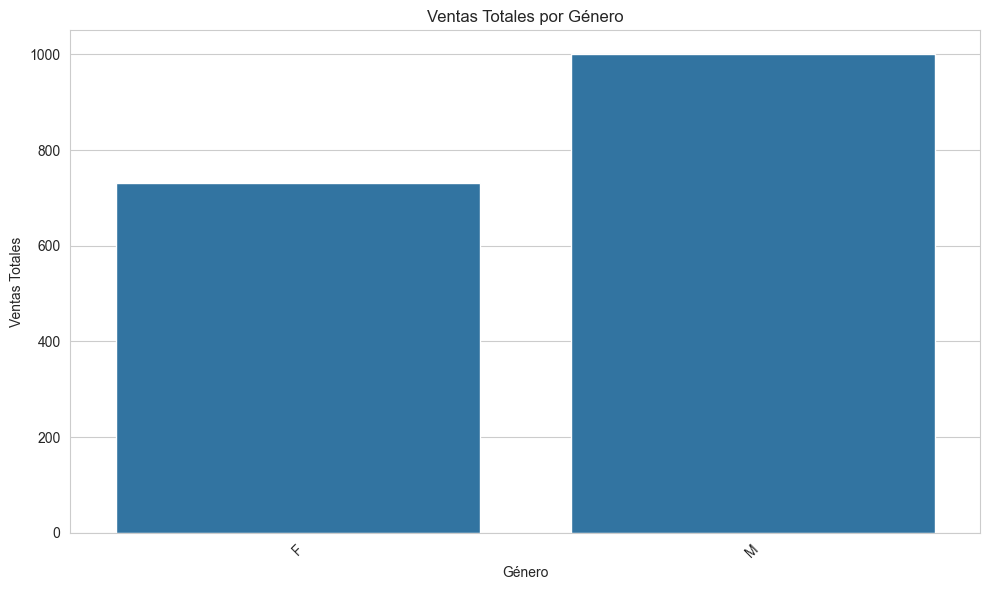

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.set_style('whitegrid')

sns.barplot(
    data= ventasGenero,
    x='Género',
    y= 'sum',
)

plt.title('Ventas Totales por Género')
plt.xlabel('Género')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

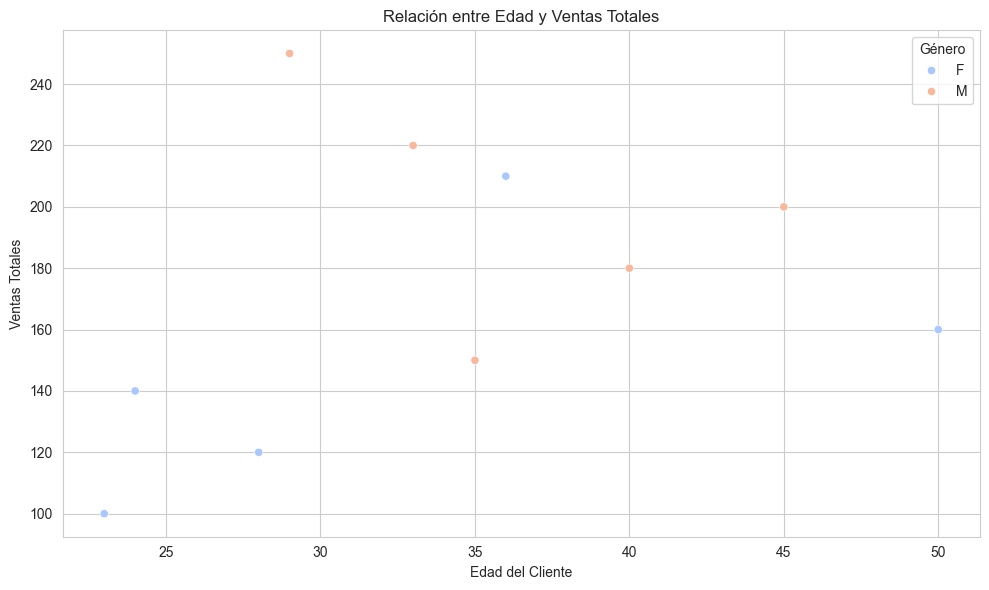

In [10]:
# Crear gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_ventas, x='Edad', y='Ventas Totales', hue='Género', palette='coolwarm')

# Personalizar el gráfico
plt.title('Relación entre Edad y Ventas Totales')
plt.xlabel('Edad del Cliente')
plt.ylabel('Ventas Totales')
plt.legend(title='Género')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [11]:
# Calcular la correlación entre Edad y Ventas Totales
correlacion = df_ventas['Edad'].corr(df_ventas['Ventas Totales'])

# Mostrar el resultado
print(f'La correlación entre Edad y Ventas Totales es: {correlacion}')

La correlación entre Edad y Ventas Totales es: 0.31928595275371174


In [23]:
cantidadProductos = df_ventas.groupby(['Género','Producto']).agg({'Cantidad':'sum'}).reset_index()
cantidadProductos

,Género,Producto,Cantidad
0,F,Camiseta,8
1,F,Zapatos,3
2,M,Pantalón,3
3,M,Zapatos,3
